In [137]:
# 필요한 패키지와 데이터파일 불러오기 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
편의점수=pd.read_csv("c:/data/project/team/raw/편의점수.csv",encoding='cp949')
# 시군구상권코드=pd.read_csv("c:/data/project/team/raw/시군구상권코드.csv",encoding='cp949')

In [142]:
# 연도별 합계로 그룹화하기
개폐업=편의점수.groupby(['기준년코드'],as_index=False).sum()
개폐업율=편의점수.groupby(['기준년코드'],as_index=False).mean()

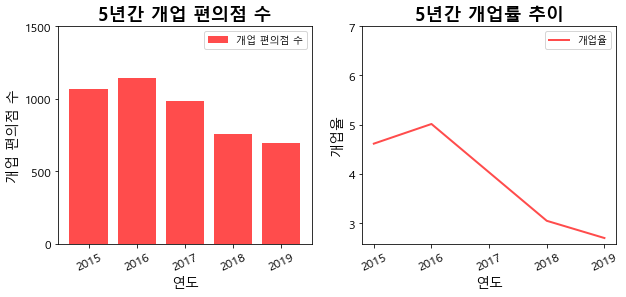

In [167]:
# 15-19 개업점포수와 개업률 시각화
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar(range(2015, 2020), 개폐업['개업점포수'], color='r', linewidth=2, alpha=0.7)
plt.title("5년간 개업 편의점 수", size=18, weight="bold")
plt.xlabel('연도', fontsize=14)
plt.ylabel('개업 편의점 수', size=14)
plt.xticks(fontsize=12, rotation=25)
plt.yticks(range(0, 2000, 500), fontsize=12)
plt.legend(['개업 편의점 수'])
plt.grid()

plt.subplot(1,2,2)
plt.plot(range(2015, 2020),개폐업율['개업율'], color='r', linewidth=2, alpha=0.7)
plt.title("5년간 개업률 추이", size=18, weight="bold")
plt.xlabel('연도', fontsize=14)
plt.ylabel('개업율', size=14)
plt.xticks(range(2015, 2020), fontsize=12, rotation=25)
plt.yticks(range(3,8,1), fontsize=12)
plt.legend(['개업율'])
plt.grid()


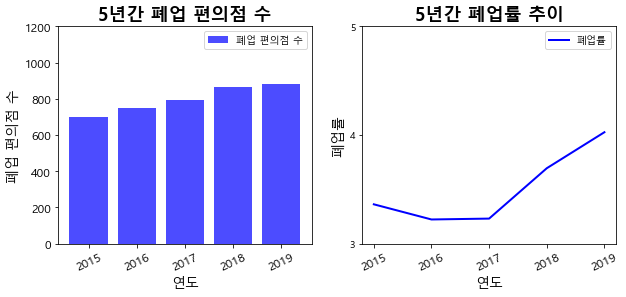

In [168]:
# 15-19 폐업점포수와 폐업률 시각화
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar(range(2015, 2020), 개폐업['폐업점포수'], color='b', linewidth=2, alpha=0.7)
plt.title("5년간 폐업 편의점 수", size=18, weight="bold")
plt.xlabel('연도', fontsize=14)
plt.ylabel('폐업 편의점 수', size=14)
plt.xticks(fontsize=12, rotation=25)
plt.yticks(range(0, 1400, 200), fontsize=12)
plt.legend(['폐업 편의점 수'])
plt.grid()

plt.subplot(1,2,2)
plt.plot(range(2015, 2020),개폐업율['폐업률'], color='b', linewidth=2)
plt.title("5년간 폐업률 추이", size=18, weight="bold")
plt.xlabel('연도', fontsize=14)
plt.ylabel('폐업률', size=14)
plt.xticks(range(2015, 2020), fontsize=12, rotation=25)
plt.yticks(range(3,6,1), fontsize=10)
plt.legend(['폐업률'])
plt.grid()
plt.show()

In [171]:
# 분기별 폐업점포수
개폐업수=편의점수.groupby(['기준년코드','기준분기코드'],as_index=False).sum()
폐업수=개폐업수.loc[:,['기준년코드','기준분기코드','폐업점포수']]
폐업수['기준년코드'] = 폐업수['기준년코드'].astype('object')
폐업수['기준분기코드'] = 폐업수['기준분기코드'].astype('object')
폐업수['기준년도코드']=폐업수['기준년코드'].map(str)+"년"+폐업수['기준분기코드'].map(str)+"분기"
폐업수=폐업수.drop(['기준년코드','기준분기코드'],axis='columns')


In [172]:
# 분기별 개업점포수
개업수=개폐업수.loc[:,['기준년코드','기준분기코드','개업점포수']]
개업수['기준년코드'] = 개업수['기준년코드'].astype('object')
개업수['기준분기코드'] = 개업수['기준분기코드'].astype('object')
개업수['기준년도코드']=개업수['기준년코드'].map(str)+"년"+개업수['기준분기코드'].map(str)+"분기"
개업수=개업수.drop(['기준년코드','기준분기코드'],axis='columns')


[]

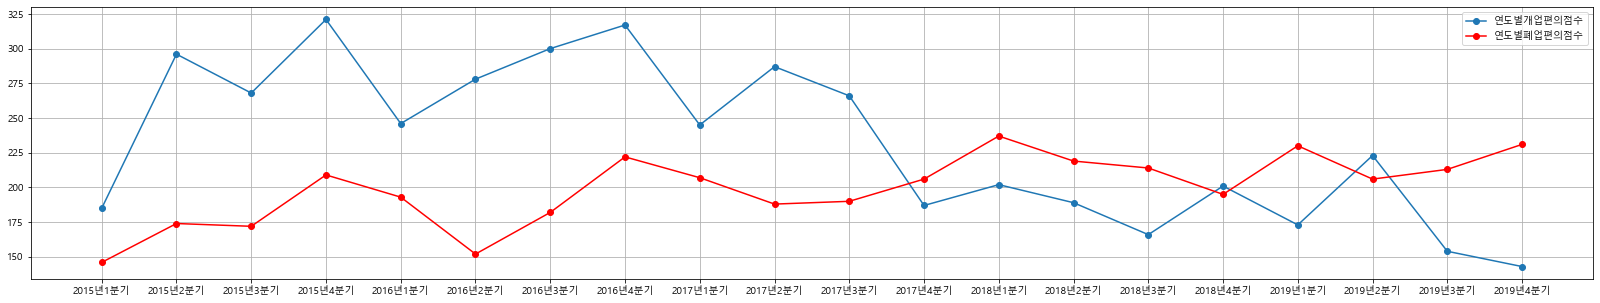

In [174]:
# 분기별 개폐업 점포수 시각화
%matplotlib inline
fig=plt.figure(figsize=(28,5))
plt.rcParams['axes.grid'] = True
ax=fig.add_subplot()
ax.plot(개업수['기준년도코드'],개업수['개업점포수'], marker='o',label='연도별개업편의점수')
ax.plot(폐업수['기준년도코드'],폐업수['폐업점포수'], color='r', marker='o',label='연도별폐업편의점수')
ax.legend()
ax.plot()